<a href="https://colab.research.google.com/github/AgymRamadhan24/Deep_Learning/blob/main/Dataset_rempah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir /content/rempah-rempah_bubuk

In [2]:
!unzip /content/drive/MyDrive/Deeplearning_rempah_bubuk/archive.zip -d /content/rempah_bubuk

Archive:  /content/drive/MyDrive/Deeplearning_rempah_bubuk/archive.zip
  inflating: /content/rempah_bubuk/Dataset/Ketumbar/IMG_20230506_124550.jpg  
  inflating: /content/rempah_bubuk/Dataset/Ketumbar/IMG_20230506_124555.jpg  
  inflating: /content/rempah_bubuk/Dataset/Ketumbar/IMG_20230506_124602.jpg  
  inflating: /content/rempah_bubuk/Dataset/Ketumbar/IMG_20230506_124624.jpg  
  inflating: /content/rempah_bubuk/Dataset/Ketumbar/IMG_20230506_124630.jpg  
  inflating: /content/rempah_bubuk/Dataset/Ketumbar/IMG_20230506_124717.jpg  
  inflating: /content/rempah_bubuk/Dataset/Ketumbar/IMG_20230506_124730.jpg  
  inflating: /content/rempah_bubuk/Dataset/Ketumbar/IMG_20230506_124733.jpg  
  inflating: /content/rempah_bubuk/Dataset/Ketumbar/IMG_20230506_124736.jpg  
  inflating: /content/rempah_bubuk/Dataset/Ketumbar/IMG_20230506_124740.jpg  
  inflating: /content/rempah_bubuk/Dataset/Ketumbar/IMG_20230506_124746.jpg  
  inflating: /content/rempah_bubuk/Dataset/Ketumbar/IMG_20230506_124755

In [3]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

In [4]:
dataset_path = Path(r'/content/rempah_bubuk')
file_path = list(dataset_path.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [5]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)
df = pd.concat([file_path, labels], axis=1)
df.columns = ['image', 'label']
df.head()

,image,label
0,/content/rempah_bubuk/Dataset/Lada/IMG_2023050...,Lada
1,/content/rempah_bubuk/Dataset/Lada/IMG_2023050...,Lada
2,/content/rempah_bubuk/Dataset/Lada/IMG_2023050...,Lada
3,/content/rempah_bubuk/Dataset/Lada/IMG_2023050...,Lada
4,/content/rempah_bubuk/Dataset/Lada/IMG_2023050...,Lada


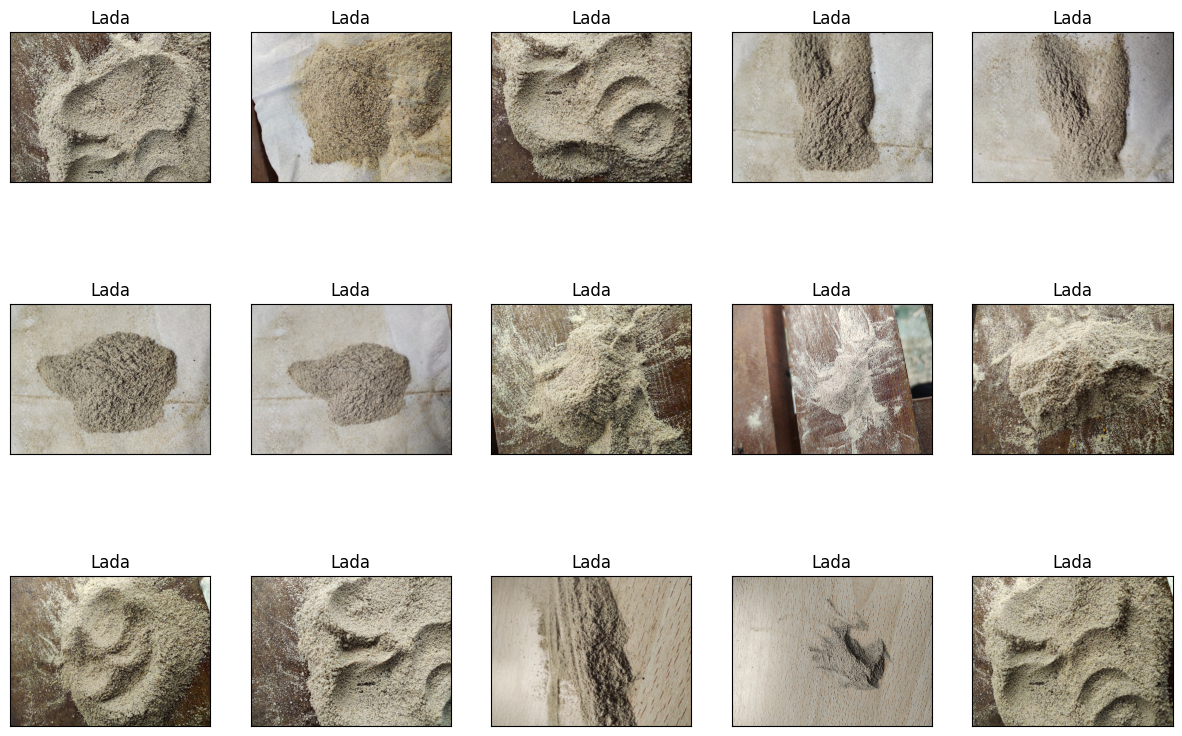

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])
    
plt.show()

In [7]:
df.label.value_counts()

Lada        100
Kunyit      100
Ketumbar    100
Name: label, dtype: int64

In [8]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()

Lada        100
Kunyit      100
Ketumbar    100
Name: label, dtype: int64

In [9]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [10]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (168, 2)
Shape of test data (90, 2)
Shape of validation data (42, 2)


In [11]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 168 validated image filenames belonging to 3 classes.
Found 90 validated image filenames belonging to 3 classes.
Found 42 validated image filenames belonging to 3 classes.


In [12]:
input_shape = (200, 200, 3)

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

In [14]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
history = model.fit(train, batch_size= 512, validation_data=val, epochs=100, callbacks=callback)

Epoch 1/100
6/6 [==============================] - 35s 5s/step - loss: 1.1111 - accuracy: 0.3452 - val_loss: 1.0759 - val_accuracy: 0.3810
Epoch 2/100
6/6 [==============================] - 30s 5s/step - loss: 1.0749 - accuracy: 0.3750 - val_loss: 1.0101 - val_accuracy: 0.4048
Epoch 3/100
6/6 [==============================] - 30s 5s/step - loss: 0.8845 - accuracy: 0.5298 - val_loss: 0.5307 - val_accuracy: 0.7381
Epoch 4/100
6/6 [==============================] - 29s 5s/step - loss: 0.5846 - accuracy: 0.6667 - val_loss: 0.4504 - val_accuracy: 0.7381
Epoch 5/100
6/6 [==============================] - 30s 5s/step - loss: 0.5768 - accuracy: 0.6726 - val_loss: 0.4701 - val_accuracy: 0.7381
Epoch 6/100
6/6 [==============================] - 31s 6s/step - loss: 0.5176 - accuracy: 0.6786 - val_loss: 0.4620 - val_accuracy: 0.7381
Epoch 7/100
6/6 [==============================] - 31s 5s/step - loss: 0.4903 - accuracy: 0.7143 - val_loss: 0.4401 - val_accuracy: 0.7619
Epoch 8/100
6/6 [==========

In [15]:
model.save('model-1.h5')

In [16]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

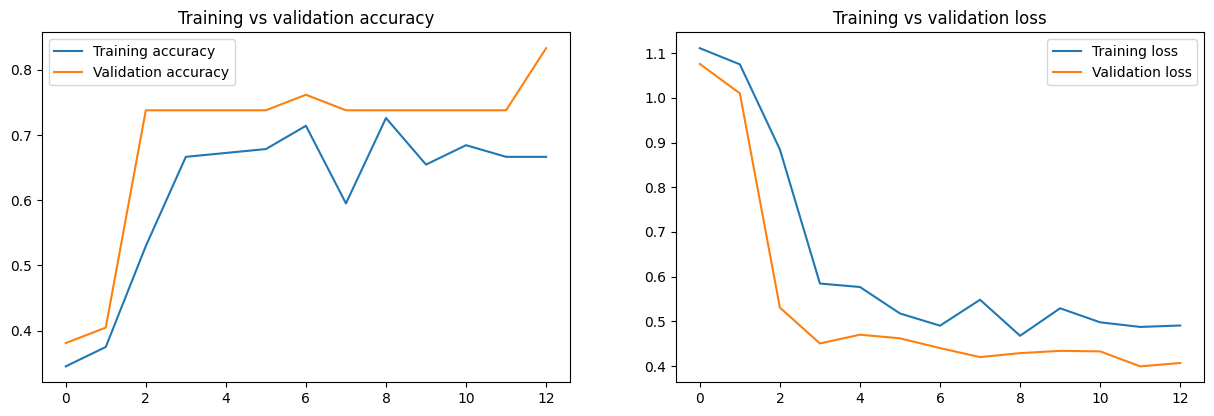

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")
plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")
plt.show()

In [18]:
pred = model.predict(test)

3/3 [==============================] - 10s 3s/step


In [19]:
pred = np.argmax(pred, axis=1)

In [20]:
labels = train.class_indices

In [21]:
labels

{'Ketumbar': 0, 'Kunyit': 1, 'Lada': 2}

In [22]:
labels = dict((v,k) for k, v in labels.items())

In [23]:
labels

{0: 'Ketumbar', 1: 'Kunyit', 2: 'Lada'}

In [24]:
y_pred = [labels[k] for k in pred]

In [25]:
print(classification_report(x_test.label, y_pred))

              precision    recall  f1-score   support

    Ketumbar       0.63      0.92      0.75        24
      Kunyit       1.00      1.00      1.00        33
        Lada       0.91      0.61      0.73        33

    accuracy                           0.83        90
   macro avg       0.85      0.84      0.82        90
weighted avg       0.87      0.83      0.83        90



In [26]:
print(confusion_matrix(x_test.label, y_pred))

[[22  0  2]
 [ 0 33  0]
 [13  0 20]]


In [27]:
test_accuracy = model.evaluate(test)[1]

3/3 [==============================] - 10s 3s/step - loss: 0.4097 - accuracy: 0.8222
